<a href="https://colab.research.google.com/github/ashutoshbaghel/emnlp17-depression/blob/master/Run%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Get more RAM, we'll need atleast 25GB :

In [0]:

# a = []
# while(1):
#     a.append('1')

## Libraries degradation


In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
tf.__version__

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6034648825530584088
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 4285779334981575532
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 12981958438926465886
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11330115994
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14680986540898006017
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [3]:
!pip install keras==1.2.2

     |████████████████████████████████| 184kB 2.7MB/s 
  Created wheel for keras: filename=Keras-1.2.2-cp36-none-any.whl size=209603 sha256=b7674590a2dc9db6b6e292fa0bc69ad2882050f7d444d1b0b578026ac50f3677
  Stored in directory: /root/.cache/pip/wheels/55/07/cf/b32db0a8d243b2fd6759d5d7cb650aa20670b2b740209cbf7e
Successfully built keras
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 1.2.2 which is incompatible.
ERROR: kapre 0.1.3.1 has requirement keras>=2.0.0, but you'll have keras 1.2.2 which is incompatible.
ERROR: fancyimpute 0.4.3 has requirement keras>=2.0.0, but you'll have keras 1.2.2 which is incompatible.
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [4]:
!pip install sacred

     |████████████████████████████████| 92kB 2.4MB/s 
     |████████████████████████████████| 92kB 6.4MB/s 
     |████████████████████████████████| 460kB 8.3MB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
  Created wheel for sacred: filename=sacred-0.8.1-py2.py3-none-any.whl size=105018 sha256=263c2f28cc925808101442eddbb3bc4a97bc1a1b58579a386bca360af1a29667
  Stored in directory: /root/.cache/pip/wheels/11/a8/f6/1d5f073245cb0a221962713adf81e56c1c9608083f85ecac9b
  Created wheel for py-cpuinfo: filename=py_cpuinfo-5.0.0-cp36-none-any.whl size=18684 sha256=cc0a8681a0f54c3b7d579c2a50e23aff21ad58547184e25d473374e0a425b384
  Stored in directory: /root/.cache/pip/wheels/01/7e/a9/b982d0fea22b7e4ae5619de949570cde5ad55420cec16e86a5
Successfully built sacred py-cpuinfo


In [5]:
import keras
keras.__version__

Using TensorFlow backend.


'1.2.2'

## Get data from Drive, code from Github

In [6]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


### Make smaller splits (Dont run again)

In [0]:
# ! gunzip rsdd_posts/training.gz
# ! mkdir train_split_4000 && split -l4000 -d rsdd_posts/training train_split_4000/training_
# ! cp -r train_split_4000/ '/gdrive/My Drive/MentalHealthData/'

In [0]:
# ## Splits for validation set
# ! gunzip rsdd_posts/validation.gz
# ! mkdir valid_split_4000
# ! split -l4000 -d rsdd_posts/validation valid_split_4000/validation_
# ! cp -r valid_split_4000/* '/gdrive/My Drive/MentalHealthData/valid_split_4000/'

### Copy data to workspace

In [0]:
# !ls -lh '/gdrive/My Drive/MentalHealthData'

In [0]:
# Unzip files in google drive. Need to do only once. 
# !mkdir '/gdrive/My Drive/MentalHealthData/data'
# !unzip -P LFimmushs6hmrFKXdZQ7cq0EGCzh2FSO -d '/gdrive/My Drive/MentalHealthData/data' '/gdrive/My Drive/MentalHealthData/RSDD.zip' 

In [0]:
# Copy train/valid/test from drive in working dir:
! mkdir -p rsdd_posts
! cp -r '/gdrive/My Drive/MentalHealthData/data/RSDD/aug_training_40k.gz' rsdd_posts/ ### YZ augmented training data
! mv rsdd_posts/aug_training_40k.gz rsdd_posts/training.gz ### YZ augmented training data

In [0]:
! cp -r '/gdrive/My Drive/MentalHealthData/data/RSDD/testing.gz' rsdd_posts/


In [0]:
# # Use full validataion:
# ! cp -r '/gdrive/My Drive/MentalHealthData/data/RSDD/validation.gz' rsdd_posts/
##-------------------------------------##
## OR Use a small split:
# Copy a split validation file and zip it

! cp -r '/gdrive/My Drive/MentalHealthData/valid_split_10000/validation_00' rsdd_posts/
! gzip rsdd_posts/validation_00 

! mv rsdd_posts/validation_00.gz rsdd_posts/validation.gz 

### Get tokenizer and cache from baseline run

In [0]:
! cp -r '/gdrive/My Drive/MentalHealthData/runs/baseline/tok_tf3_df2.p' .

In [0]:
#! cp -r '/gdrive/My Drive/MentalHealthData/runs/baseline/data/' .

In [0]:
! mkdir -p data && mkdir -p data/redcache

## Get pretrained wordvecs and rename that file

In [0]:
fn = "glove.6B.50d.txt"
! cp -r '/gdrive/My Drive/MentalHealthData/pretrained_vectors/{fn}' data/w2v_50_sg_export.txt

## RUNS:

In [14]:
branch = 'dense-dropout-lstm' ## All options: master, maxpooling, multifilter, lstm
! rm -rf emnlp17-depression/
! git clone https://github.com/ashutoshbaghel/emnlp17-depression.git && cd emnlp17-depression && git checkout "{branch}" && mv model/* /content/

Cloning into 'emnlp17-depression'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 136 (delta 30), reused 55 (delta 17), pack-reused 66
Receiving objects: 100% (136/136), 165.88 KiB | 312.00 KiB/s, done.
Resolving deltas: 100% (44/44), done.
Branch 'dense-dropout-lstm' set up to track remote branch 'dense-dropout-lstm' from 'origin'.
Switched to a new branch 'dense-dropout-lstm'


In [0]:
## Copy the weights if you dont want to train again:
# ! cp -r '/gdrive/My Drive/MentalHealthData/runs/{branch}/tmp/' ./

In [0]:
# Don't run training again for now. Just use the old best weights
! python reddit.py

Using TensorFlow backend.
WARNING - train - No observers have been added to this run
INFO - train - Running command 'main'
INFO - train - Started

WARNING - tensorflow - From reddit.py:46: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.


WARNING - tensorflow - From reddit.py:47: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.


WARNING - tensorflow - From reddit.py:50: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.


WARNING - tensorflow - From reddit.py:51: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2020-05-08 22:09:32.512498: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-05-08 22:09:32.515906: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at le

In [0]:
# Backup run data
# ! cp -r tmp '/gdrive/My Drive/MentalHealthData/runs/{branch}/'


In [0]:
## Set path for weights from highest f1-precision-recall epoch
best_w = "tmp/w/acl:15.af:relu.batch:64.cosine:False.densed:50.embed_size:50.epochs:25.etrain:True.filters:25.filtlen:3.lr:0.001.max_length:100.max_posts:400.mindf:2.mintf:3.noempty:False.poollen:25.prep:None.ptype:acnn.randposts:False.seed:123456.w2v:False_1588969571/13-0.53_0.47_0.60"

## Test Results

loading training posts
loading tokenizer
found 966881 words; generator ready
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_7 (InputLayer)             (None, 400, 100)      0                                            
____________________________________________________________________________________________________
timedistributed_13 (TimeDistribu (None, 400, 100, 50)  48344050    input_7[0][0]                    
____________________________________________________________________________________________________
timedistributed_14 (TimeDistribu (None, 400, 25)       3775        timedistributed_13[0][0]         
____________________________________________________________________________________________________
convolution1d_13 (Convolution1D) (None, 26, 25)        9400        timedistributed_14[0][0]         
______________

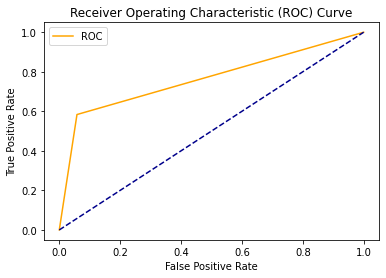

In [71]:
%matplotlib inline
% run test.py "{best_w}"